<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/01-intro/DataHandling_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please, fill in before you start:

First Name: Alexandra

Last Name: Serechenko

Group:

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [Majid-Sohrabi](https://github.com/Majid-Sohrabi), [abdalazizrashid](https://github.com/abdalazizrashid) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

In [92]:
import numpy as np

In [1]:
import pandas as pd
data = pd.read_csv("train (1).csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [2]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

surv_rate = data.groupby('Pclass').Survived.mean()
surv_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Task 2 (1 point)

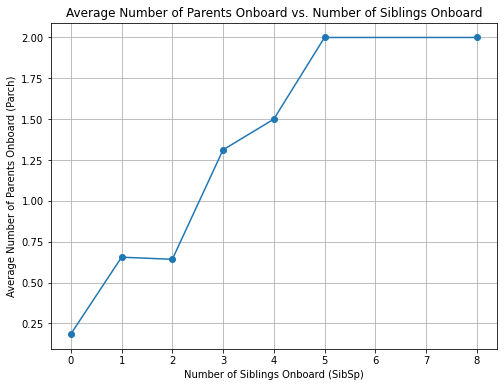

In [3]:
# Plot the average number of parents onboard (`Parch`) as a function of the
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

# Group the data by the number of siblings onboard and calculate the average Parch
average_parch_by_sibsp = data.groupby('SibSp')['Parch'].mean()

# Convert the result to a list
sibsp_values = average_parch_by_sibsp.index
average_parch_values = average_parch_by_sibsp.values

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(sibsp_values, average_parch_values, marker='o', linestyle='-')
plt.title('Average Number of Parents Onboard vs. Number of Siblings Onboard')
plt.xlabel('Number of Siblings Onboard (SibSp)')
plt.ylabel('Average Number of Parents Onboard (Parch)')
plt.grid(True)
plt.show()

## Task 3 (2 points)

In [4]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  features = dataset[["Fare", "Parch", 'Age', 'Sex' ,'SibSp']].copy()
  features["Fare"] /= features["Fare"].mean()
  features["Age"] = features["Age"].fillna(features["Age"].median())
  features.Sex.replace(['male', 'female'], [1,0], inplace=True)

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    algorithm = 'kd_tree',
    n_neighbors=5
)


# Validation code (do not touch)
data = pd.read_csv("train (1).csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.81


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_selection_and_preprocessing(data.drop('Survived', axis=1)), data['Survived'], test_size=100, random_state=42)

In [6]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [77]:
test_predictions = model.predict(X_test)

In [70]:
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.53


As you can see, after dividing the sample by using the  train_test_splitmethod, the accuracy of the model has noticeably decreased!

In [58]:
test_predictions_prob = model.predict_proba(X_test)

In [87]:
test_error = (y_test - test_predictions)**2

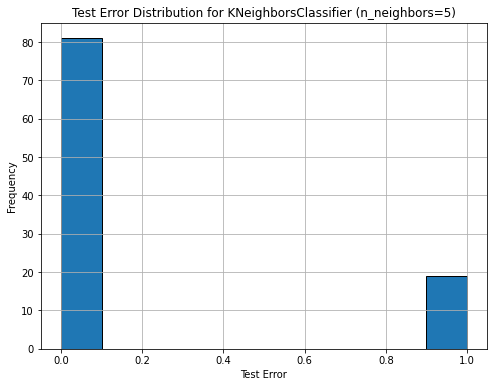

In [88]:
#the first way to illustrate error
plt.figure(figsize=(8, 6))
plt.hist(test_error, bins=10, edgecolor='black')
plt.title(f'Test Error Distribution for KNeighborsClassifier (n_neighbors=5)')
plt.xlabel('Test Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

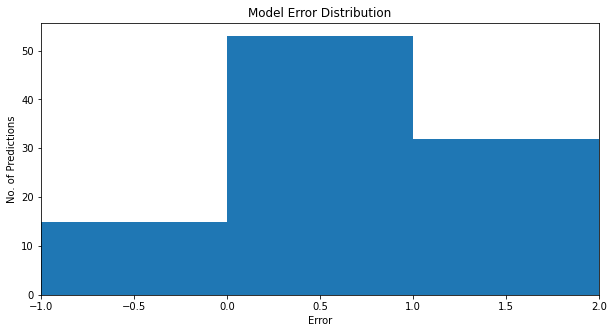

In [93]:
#the second one
error = y_test - test_predictions

plt.subplots(figsize=(10,5))
plt.xlim(-1, 2)
plt.title('Model Error Distribution')
plt.ylabel('No. of Predictions')
plt.xlabel('Error')
plt.hist(error, bins=np.linspace(-1, 2, num=41, dtype=int));
plt.show()